In [21]:
#
# Wordle.py
#

import streamlit as st
import csv
import random
dictionary = []
record = []

with open('5_letters.csv', 'r') as file:
    reader = csv.reader(file)
    listlist = list(reader)
    
for i in range(len(listlist)-1):
    dictionary.append(''.join(listlist[i+1]))
     
def wordle_feedback(target_word, guess_word):
    green = [(i, g) for i, (t, g) in enumerate(zip(target_word, guess_word)) if t == g]
    remaining = [(i, t, g) for i, (t, g) in enumerate(zip(target_word, guess_word)) if t != g]
    
    remaining_target = [t for i, t, g in remaining]
    yellow = []
    black = []

    for i, t, g in remaining:
        if g in remaining_target:
            yellow.append((i, g))
            remaining_target.remove(g)  # Remove the letter from the target list so it can't be used again
        else:
            black.append((i, g))

    return {"green": green, "yellow": yellow, "black": black}


def is_consistent(word, feedback):
    # Create list from word and a copy for yellow check
    word_list = list(word)
    remaining_letters = word_list.copy()

    # 'green' checks: correct letter must be at the correct index
    for index, letter in feedback['green']:
        if word_list[index] != letter:
            return False
        remaining_letters.remove(letter)  # Mark as used

    # 'yellow' checks: correct letter can't be at the same index, but must exist elsewhere
    for index, letter in feedback['yellow']:
        if word_list[index] == letter or letter not in remaining_letters:
            return False
        remaining_letters.remove(letter)  # Mark as used

    # 'black' checks: letter must not be in the word at all
    for index, letter in feedback['black']:
        if letter in remaining_letters:
            return False

    return True


def create_Qtable(dictionary):
    
    dict = {key: 0 for key in dictionary} #create dictionary
    
    for key1 in dict: #step through potential target words
        for key2 in dict: #step through each word in dictrionary
            
            feedback = wordle_feedback(key1, key2) #feedback for traget key1 compared with guess key2
            
            for key3 in dict: #computing reduction in length of dictionary by chosing key1 for each key2
                
                inconsistent = 0 #reset counter 
                
                if not is_consistent(key3, feedback):
                    inconsistent += 1 #counting how many words are eliminated from dicationary 
                    
                dict[key2] = dict[key2] + inconsistent #updates key2 for reduction in length of dictionary
                #Updating Qtable
        
    return(dict)

def play_wordle(word):
    """ 
    
    """
    
    feedback = wordle_feedback(word, "cares")
    
    remaining_dict = []
    
    for wordtest in dictionary:
        if is_consistent(wordtest, feedback):
            remaining_dict.append(wordtest)
            
    Qtable = create_Qtable(remaining_dict)
    
    guess = nextguess(Qtable)
    remaining_dict.remove(guess)
    
   
    for i in range(2,55):
        feedback = wordle_feedback(word, guess)
        print("Feedback = ", feedback)
        if len(feedback['green']) == 5:
#             print(i, "tries")
            record.append(i)
            break
            
        temp = []
            
        for wordtest in remaining_dict:    
            if is_consistent(wordtest, feedback):
                temp.append(wordtest)
                
        remaining_dict = temp
            
        Qtable = create_Qtable(remaining_dict)
    
        guess = nextguess(Qtable)
    
        print(guess)
        remaining_dict.remove(guess)
  
    
    return record

def nextguess(d):
    #find a key with a maximum value.  Choose randomly if there is a tie
    
    import random
    
    max_val = max(d.values())
    keys_with_max_val = [key for key, value in d.items() if value == max_val]
    return random.choice(keys_with_max_val)

'arose'

In [23]:
random.choice(dictionary)
word = random.choice(dictionary)
result = play_wordle(word)
print(result)


banks
daubs
3 tries
[6, 3]


In [24]:
import pandas as pd

In [25]:
df = pd.read_csv("5_letters.csv")

In [26]:
df.head()

,1,2,3,4,5
0,a,b,a,c,k
1,a,b,a,s,e
2,a,b,a,t,e
3,a,b,a,y,a
4,a,b,b,e,y


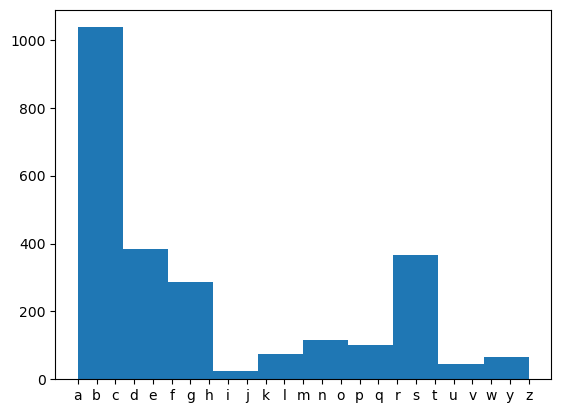

In [39]:
df['1'].hist(grid=False);

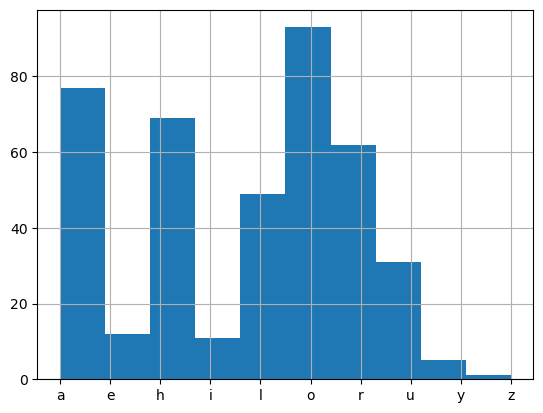

In [32]:
df[df['1']=='c']['2'].hist();

In [37]:
pd.DataFrame.hist()

TypeError: hist_frame() missing 1 required positional argument: 'data'